# 🌀 Wavefunction Collapse Simulation (Quantum Double-Slit)

This animated simulation demonstrates the collapse of the wavefunction in the famous double-slit experiment.  
Before the collapse, photons exhibit interference behavior. After a certain point, the wavefunction collapses and a uniform detection pattern emerges.  
A visual red flash marks the moment of collapse.

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation
from IPython.display import HTML

# Set seed for reproducibility
np.random.seed(42)

In [5]:
num_photons = 200              # Total number of photons to simulate
collapse_at = 100              # Index of wavefunction collapse

In [6]:
# Interference pattern before collapse: two Gaussian distributions (double slit)
x1 = np.random.normal(loc=-0.3, scale=0.1, size=collapse_at // 2)
x2 = np.random.normal(loc=0.3, scale=0.1, size=collapse_at // 2)
interference = np.concatenate([x1, x2])

# Uniform distribution after collapse (no interference)
no_interference = np.random.uniform(-0.5, 0.5, num_photons - collapse_at)

# Combined photon detections
detections = np.concatenate([interference, no_interference])

Text(0, 0.5, 'Detected Photons')

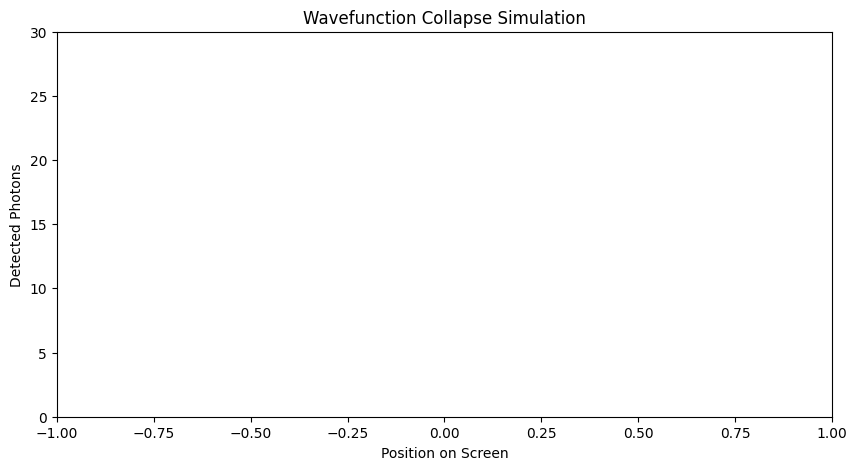

In [7]:
bins = np.linspace(-1, 1, 40)
counts = np.zeros(len(bins) - 1)

fig, ax = plt.subplots(figsize=(10, 5))
bars = ax.bar((bins[:-1] + bins[1:]) / 2, counts, width=0.05, color='deepskyblue')

ax.set_xlim(-1, 1)
ax.set_ylim(0, 30)
ax.set_title("Wavefunction Collapse Simulation")
ax.set_xlabel("Position on Screen")
ax.set_ylabel("Detected Photons")

In [8]:
def update(frame):
    if frame >= num_photons:
        return bars

    new_x = detections[frame]
    bin_idx = np.searchsorted(bins, new_x) - 1

    if 0 <= bin_idx < len(counts):
        counts[bin_idx] += 1
        bars[bin_idx].set_height(counts[bin_idx])

    # Flash effect to represent collapse event
    if frame == collapse_at:
        for b in bars:
            b.set_color('red')  # flash
    elif frame == collapse_at + 3:
        for b in bars:
            b.set_color('deepskyblue')  # return to original color

    return bars

In [9]:
ani = animation.FuncAnimation(
    fig,
    update,
    frames=num_photons,
    interval=50,
    blit=False,
    repeat=False
)

HTML(ani.to_jshtml())

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=f005ecdb-da4f-4484-8639-0db890a640f7' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>